# Analysis de origen de los datos de audio
Se comprueba y compara el rendimiento de un modelo convertido a TensorFlow Lite en función del tipo de optimización
aplicada.
## Imports

In [1]:
from audio_model_evaluation import tensorflow_lite_model_evaluation

## Parámetros
Parámetros del análisis que se efectuará.

In [2]:
project_dir = "/home/daniel/PycharmProjects/tfg-tinyml"
saved_models_dir = f"{project_dir}/saved models/audio"
micro_data_all_dir = f"{project_dir}/samples/microcontroller/audio/all"
ext_data_test_dir = f"{project_dir}/samples/external/audio/test"
non_quantized_model_path = f"{saved_models_dir}/tensorflow lite/ExtAudioDataModel.tflite"
quantized_model_path = f"{saved_models_dir}/tensorflow lite/ExtAudioDataModelQuant.tflite"
qat_model_path = f"{saved_models_dir}/tensorflow lite/ExtAudioDataModelQAT.tflite"
label_index_dir = f"{saved_models_dir}/label index mappings"
label_index_path = f"{label_index_dir}/ExtAudioDataModel.joblib"

## Modelo sin cuantizar
Comprobamos el rendimiento del modelo sin cuantizar sobre los datos de la partición test externa y los datos captados
con el microcontrolador.

Testing model located in "/home/daniel/PycharmProjects/tfg-tinyml/saved models/audio/tensorflow lite/ExtAudioDataModel.tflite".
Model size 14.58984375 Kb
Using 3230 samples.
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


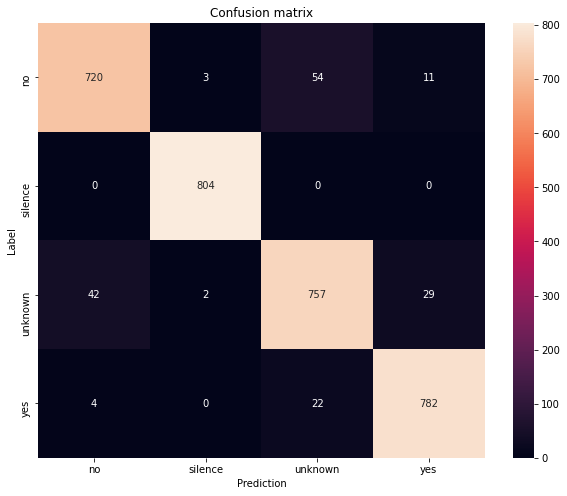

              precision    recall  f1-score   support

          no    0.93995   0.91371   0.92664       788
     silence    0.99382   1.00000   0.99690       804
     unknown    0.90876   0.91205   0.91040       830
         yes    0.95134   0.96782   0.95951       808

    accuracy                        0.94830      3230
   macro avg    0.94847   0.94839   0.94836      3230
weighted avg    0.94819   0.94830   0.94818      3230

Average time: 0.283266590106598 ms
Max time: 4.164934158325195 ms
Min time: 0.11086463928222656 ms
Using 452 samples.


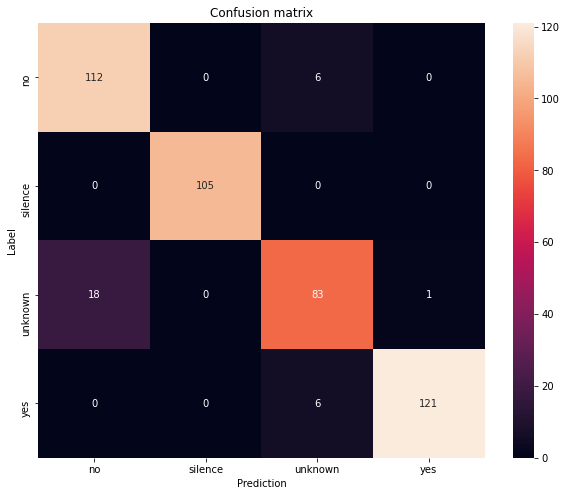

              precision    recall  f1-score   support

          no    0.86154   0.94915   0.90323       118
     silence    1.00000   1.00000   1.00000       105
     unknown    0.87368   0.81373   0.84264       102
         yes    0.99180   0.95276   0.97189       127

    accuracy                        0.93142       452
   macro avg    0.93176   0.92891   0.92944       452
weighted avg    0.93305   0.93142   0.93133       452

Average time: 0.2669839732414853 ms
Max time: 1.1582374572753906 ms
Min time: 0.11110305786132812 ms


In [3]:
tensorflow_lite_model_evaluation(non_quantized_model_path, [ext_data_test_dir, micro_data_all_dir], label_index_path)

## Modelo cuantizado
Comprobamos el rendimiento del modelo cuantizado sobre los datos de la partición test externa y los datos captados
con el microcontrolador.

Testing model located in "/home/daniel/PycharmProjects/tfg-tinyml/saved models/audio/tensorflow lite/ExtAudioDataModelQuant.tflite".
Model size 5.890625 Kb
Using 3230 samples.


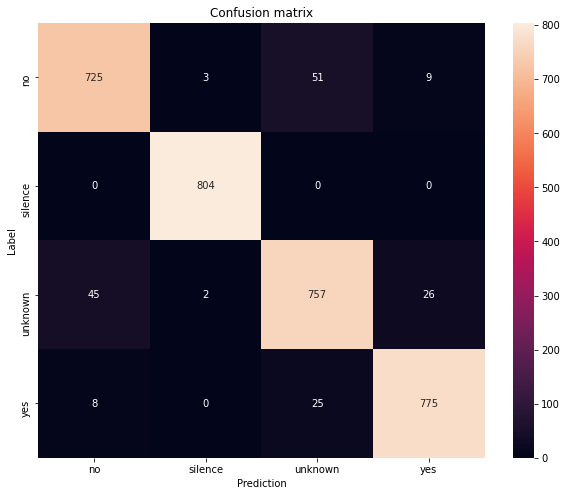

              precision    recall  f1-score   support

          no    0.93188   0.92005   0.92593       788
     silence    0.99382   1.00000   0.99690       804
     unknown    0.90876   0.91205   0.91040       830
         yes    0.95679   0.95916   0.95797       808

    accuracy                        0.94768      3230
   macro avg    0.94781   0.94781   0.94780      3230
weighted avg    0.94759   0.94768   0.94762      3230

Average time: 1.4062954545390127 ms
Max time: 20.790576934814453 ms
Min time: 0.63323974609375 ms
Using 452 samples.


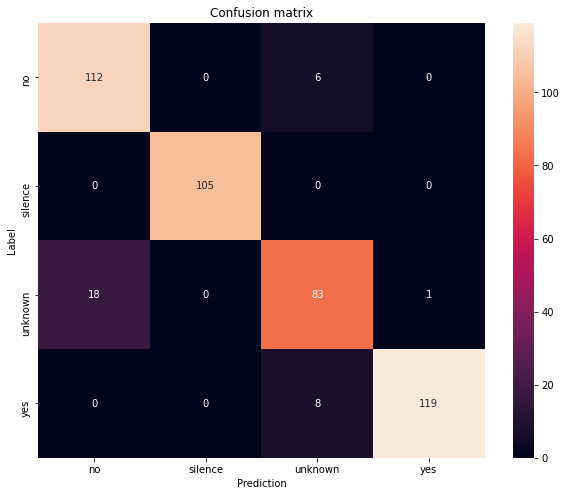

              precision    recall  f1-score   support

          no    0.86154   0.94915   0.90323       118
     silence    1.00000   1.00000   1.00000       105
     unknown    0.85567   0.81373   0.83417       102
         yes    0.99167   0.93701   0.96356       127

    accuracy                        0.92699       452
   macro avg    0.92722   0.92497   0.92524       452
weighted avg    0.92894   0.92699   0.92708       452

Average time: 1.4314640939763161 ms
Max time: 3.765583038330078 ms
Min time: 0.6334781646728516 ms
Quantized models can perform slower as they are intended to work on ARM devices.


In [4]:
tensorflow_lite_model_evaluation(quantized_model_path, [ext_data_test_dir, micro_data_all_dir], label_index_path,
                                 quantized=True)

## Modelo QAT
Comprobamos el rendimiento del modelo cuantizado durante el entrenamiento sobre los datos de la partición test externa y
los datos captados con el microcontrolador.

Testing model located in "/home/daniel/PycharmProjects/tfg-tinyml/saved models/audio/tensorflow lite/ExtAudioDataModelQAT.tflite".
Model size 6.1328125 Kb
Using 3230 samples.


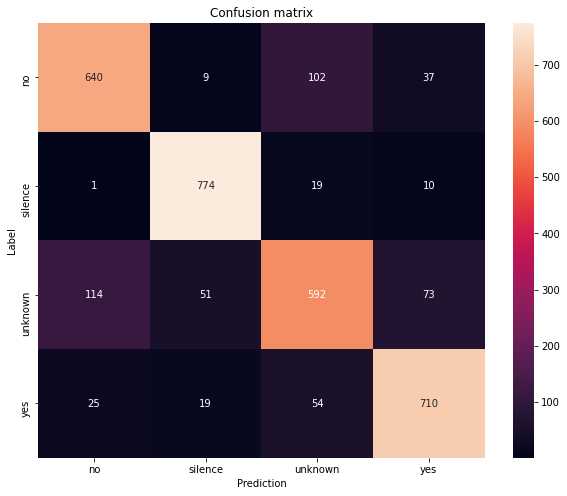

              precision    recall  f1-score   support

          no    0.82051   0.81218   0.81633       788
     silence    0.90739   0.96269   0.93422       804
     unknown    0.77184   0.71325   0.74139       830
         yes    0.85542   0.87871   0.86691       808

    accuracy                        0.84087      3230
   macro avg    0.83879   0.84171   0.83971      3230
weighted avg    0.83836   0.84087   0.83907      3230

Average time: 1.4568982847703869 ms
Max time: 4.856348037719727 ms
Min time: 0.6330013275146484 ms
Using 452 samples.


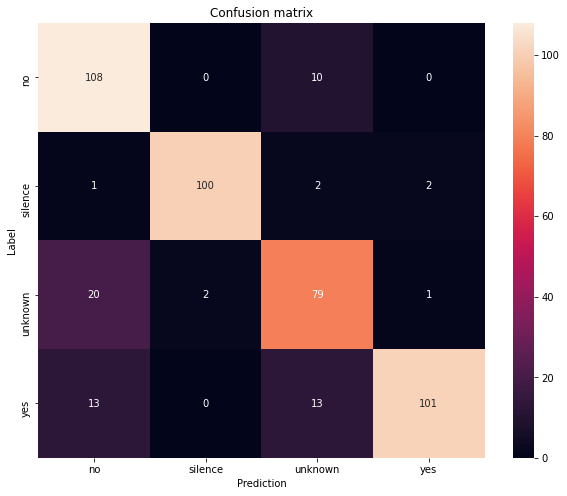

              precision    recall  f1-score   support

          no    0.76056   0.91525   0.83077       118
     silence    0.98039   0.95238   0.96618       105
     unknown    0.75962   0.77451   0.76699       102
         yes    0.97115   0.79528   0.87446       127

    accuracy                        0.85841       452
   macro avg    0.86793   0.85936   0.85960       452
weighted avg    0.87059   0.85841   0.86011       452

Average time: 1.4565122865997584 ms
Max time: 3.022909164428711 ms
Min time: 0.6330013275146484 ms
Quantized models can perform slower as they are intended to work on ARM devices.


In [5]:
tensorflow_lite_model_evaluation(qat_model_path, [ext_data_test_dir, micro_data_all_dir], label_index_path,
                                 quantized=True)

